In [4]:
from depth_anything.dpt import DepthAnything
from matplotlib import pyplot as plt
import torch.nn.functional as F
import numpy as np
import cv2
from depth_anything.util.transform import Resize, NormalizeImage, PrepareForNet
from torchvision.transforms import Compose
import torch
from time import sleep
from ultralytics import YOLO as yolo

encoder = 'vitl'  # can also be 'vitb' or 'vitl' 'vits'
model_id = 'depth_anything_{:}14'.format(encoder)


In [5]:
model = yolo("yolov10n.pt")

In [6]:
if torch.cuda.is_available():
    DEVICE='cuda'
    depth_anything = DepthAnything.from_pretrained(f'LiheYoung/{model_id}').to(DEVICE).eval()
else :
    DEVICE='cpu'
    depth_anything = DepthAnything.from_pretrained(f'LiheYoung/{model_id}')
print(DEVICE)

xFormers not available
xFormers not available


cuda


In [7]:
image=cv2.imread(r"C:\Users\jaska\OneDrive\Pictures\Screenshots\Screenshot 2024-09-10 154154.png")
image_da = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
transform = Compose([
        Resize(
            width=518,
            height=518,
            resize_target=False,
            ensure_multiple_of=14,
            resize_method='lower_bound',
            image_interpolation_method=cv2.INTER_CUBIC,
        ),
        NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        PrepareForNet(),
    ])
h, w = image_da.shape[:-1]
image_da = transform({'image': image})['image']
image_da = torch.from_numpy(image_da).unsqueeze(0).to(DEVICE)

In [8]:
depth = depth_anything(image_da)
results = model(image,)


0: 512x640 6 persons, 207.9ms
Speed: 26.2ms preprocess, 207.9ms inference, 254.1ms postprocess per image at shape (1, 3, 512, 640)


In [9]:
depth = F.interpolate(depth[None], (h, w), mode='bilinear', align_corners=False)[0, 0]
depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0

In [10]:
depth = depth.cpu().detach().numpy().astype(np.uint8)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_INFERNO)

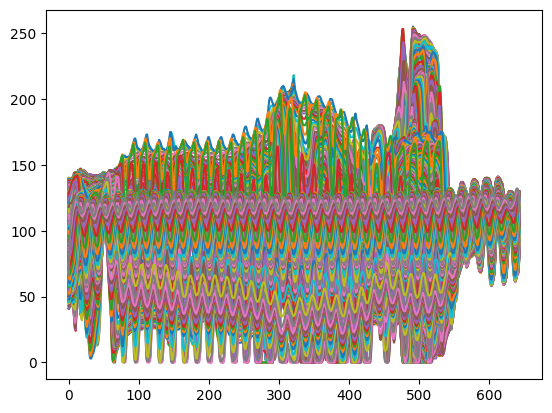

: 

In [23]:
plt.plot(depth)

In [20]:
image.shape

(644, 818, 3)

In [17]:
cv2.imshow('web',depth_color)

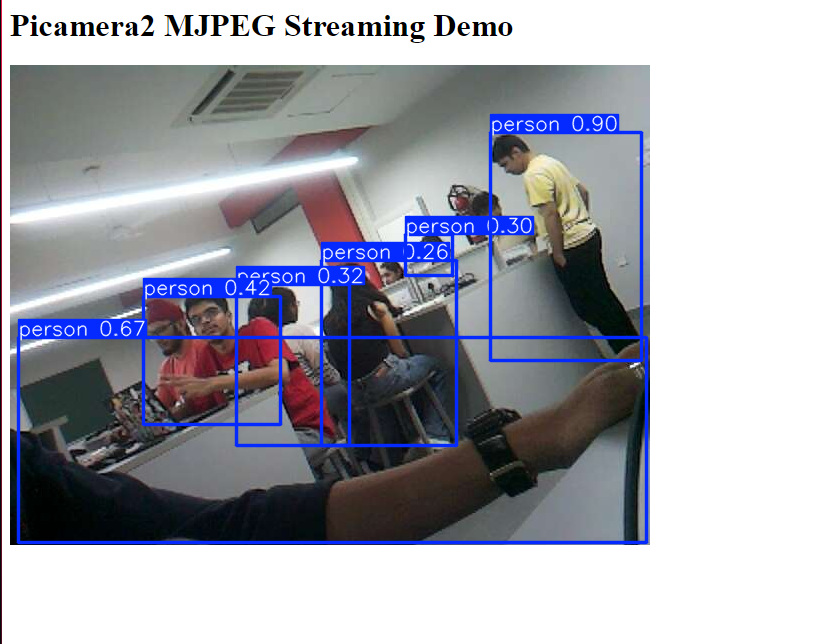

In [11]:

results[0].show()
